# CREDIT CARD DATA CLUSTERING (Project ECE 447)

## Group Members:
### Abhi Sharma: 1643951
### Gurvansh Singh: 1619399
### Purnapushkala Hariharan: 1623714
### Taranjot Singh: 1543004

## Exploring our Data / Data Preprocessing

In [1]:
#loading our data
import pandas as pd
credit = pd.read_csv("credit-card.csv")

In [2]:
credit

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
min(credit["MINIMUM_PAYMENTS"])

0.019163

Just by looking at the dataset, we can clearly see that there are a lot of missing values in some of the columns. Let us check how many missing values are there in each of the columns.

In [4]:
# Cheching for missing values
credit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can clearly see above that there are a lot of missing values in the minimum payments column. Now we need to figure out a way using which we can deal with these missing values.
This can be done in a number of different ways but let us first look at what the column represents.

In [5]:
credit["MINIMUM_PAYMENTS"].head(20)

0       139.509787
1      1072.340217
2       627.284787
3              NaN
4       244.791237
5      2407.246035
6       198.065894
7       532.033990
8       311.963409
9       100.302262
10     2172.697765
11      155.549069
12      490.207013
13      251.137986
14      989.962866
15     2109.906490
16      376.579631
17       73.203221
18      744.613395
19    12465.549380
Name: MINIMUM_PAYMENTS, dtype: float64

Now since we cannot conclude much by just looking at this, thus we need to see what variable does this feature depend most on and for doing that we can plot a coorelation specifically for this feature. 

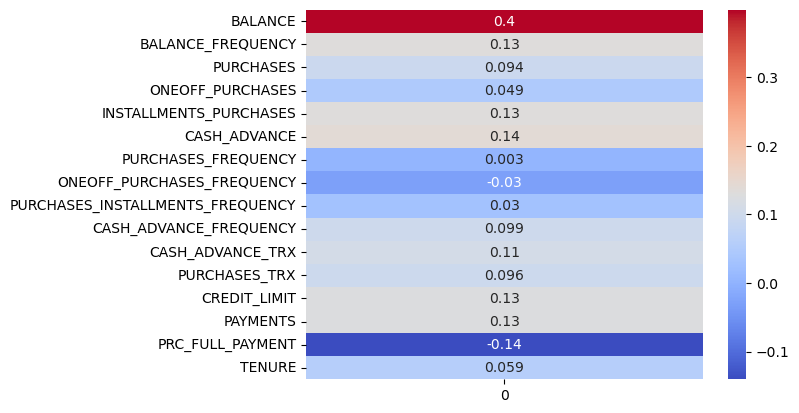

In [6]:
#Plotting the correlation
import seaborn as sns
temp_df = credit.drop("MINIMUM_PAYMENTS", axis = 1)
corr_mat = temp_df.corrwith(credit["MINIMUM_PAYMENTS"])
sns.heatmap(corr_mat.to_frame(), annot = True, cmap = "coolwarm");

Here we can clearly see that the feature variable labelled `MINIMUM_PAYMENTS` is most influenced by the variable `BALANCE`. As mentioned earlier, there are a number of different ways of dealing with missing data. For instance, we can either remove the records with missing data, we can take the mean or the median of the column. However, here we try to use the column called `BALANCE` for predicting the value of `MINIMUM_PAYMENTS`. I will use 3 to 4 most prominent features to predict this.  

This can be done using a simple linear regression model.

In [7]:
credit.shape

(8950, 18)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
credit["CREDIT_LIMIT"].fillna(value = np.argmax(credit["CREDIT_LIMIT"]), inplace = True) 
# Since there is only 1 missing value in the credit limit column we are filling it up with the value with the most frequency/mode.

In [9]:
credit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
X1 = credit.dropna()

In [11]:
X1

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8943  C19184     5.871712           0.500000      20.90             20.90   
8945  C19186    28.493517           1.000000     291.12              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717  

In [12]:
X1 = X1.drop("CUST_ID", axis = 1)
X2 = X1.drop("MINIMUM_PAYMENTS", axis = 1)
y = X1["MINIMUM_PAYMENTS"]

In [13]:
X2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084          0.000000      12  
1     4103.032597          0.222222      12  
2      622.066742          0.000000      12  
4      678.334763          0.000000      12  
5     1400.057770          0.000000      12  
...           ...               ...     ...  
8943    58.644883          0.000000       6  
8945   325.594462          0.500000       6  
8947    81.270775          0.250000       6  
8948    52.549959          0.250000       6  
8949    63.165404          0.000000       6  

[8637 rows x 16 columns]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2)

In [15]:
X_train.shape

(6909, 16)

In [16]:
reg = LinearRegression()

In [17]:
import numpy as np
np.random.seed(42)
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
r2 = reg.score(X_test, y_test)


In [19]:
#let us also look at the mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

In [20]:
r2

0.16319680074034337

In [21]:
#np.random.seed(42)
reg1 = RandomForestRegressor()
reg1.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
reg1.score(X_test, y_test)

0.4583592309102382

In [23]:
test_preds = reg1.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, test_preds)

442.53606505316554

We have tried a couple of different ways to impute, however due to low correlation between the features we concluded that it will be best if we use Another way to impute missing values is the KNNImputer

However just before I do that I just need to check the accuracy of the model and to do that I will drop some values from the training values and then check how good the model is in predicting the values

In [24]:
credit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [25]:
knn_df = credit.drop("CUST_ID", axis = 1)

In [26]:
knn_df.dropna(inplace=True)

In [27]:
knn_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717          0.000000       6  
8945   325.594462         48.886365          0.500000       6  
8947    81

In [28]:
knn_df.shape

(8637, 17)

In [29]:
knn_df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [30]:
len(knn_df.index.unique())

8637

In [31]:
knn_df = knn_df.reset_index(drop=True)

In [32]:
max(knn_df.index)

8636

In [33]:
# randomly drop 1800 values of and store them in a list
import random
missing_values = []
dropped_indices = []
while len(dropped_indices) < 1800:
    idx = np.random.choice(knn_df.index)
    if idx not in dropped_indices:
        dropped_indices.append(idx)
        missing_values.append(knn_df.loc[idx, "MINIMUM_PAYMENTS"])
        knn_df.loc[idx, "MINIMUM_PAYMENTS"] = np.nan

In [34]:
knn_df.isna().sum()

BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           0
PAYMENTS                               0
MINIMUM_PAYMENTS                    1800
PRC_FULL_PAYMENT                       0
TENURE                                 0
dtype: int64

In [35]:
from sklearn.impute import KNNImputer
features = knn_df.columns

# Fit KNNImputer model on training set
k = 5
imputer = KNNImputer(n_neighbors=k)
knn_imputed = imputer.fit_transform(knn_df[features])
df1 = pd.DataFrame(knn_imputed, columns = features)


Now let us check the accuracy of our model and compare the R2 score and the mean absolute error.

In [36]:
values_list = list(df1.iloc[dropped_indices]["MINIMUM_PAYMENTS"])

Let us now check the accuracy of our KNNImputer

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mean_absolute_error(values_list, missing_values)

488.5303164794445

In [38]:
r2_score(values_list, missing_values)

-4.6779803479644455

After trying a bunch of different methods to impute the data we have concluded that the feature with the missing values `MINIMUM PAYMENTS` has very little correlation with the rest of the variable and thus we are getting very little accuracy and high MAE values.
Thus considering everything we concluded that it will be best to drop the missing values.

In [39]:
credit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Dropping missing values

In [40]:
credit_new = credit.dropna()

In [41]:
credit_new.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [42]:
credit_new= credit_new.drop("CUST_ID", axis = 1)

In [43]:
credit_new

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717          0.000000       6  
8945   325.594462         48.886365          0.500000       6  
8947    81

In [44]:
credit_new.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8637.000000        8637.000000   8637.000000       8637.000000   
mean    1601.041632           0.894951   1025.315149        604.831402   
std     2095.519182           0.207833   2167.010602       1684.222861   
min        0.000000           0.000000      0.000000          0.000000   
25%      147.838347           0.909091     43.300000          0.000000   
50%      916.749476           1.000000    375.240000         44.990000   
75%     2104.961701           1.000000   1145.850000        598.950000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8637.000000   8637.000000          8637.000000   
mean               420.794807    994.082050             0.495943   
std                917.203254   2121.353259             0.401285   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.710000      0.000000             0.500000   
75%                484.040000   1131.986387             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8637.000000                       8637.000000   
mean                     0.205885                          0.368778   
std                      0.300044                          0.398090   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8637.000000       8637.000000    8637.000000   8637.000000   
mean                 0.137608          3.313651      15.031492   4522.135363   
std                  0.201780          6.912151      25.179530   3659.030833   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count   8637.000000       8637.000000       8637.000000  8637.00000  
mean    1784.272537        864.206542          0.159285    11.53375  
std     2909.704331       2372.446607          0.296259     1.31226  
min        0.049513          0.019163          0.000000     6.00000  
25%      418.446951        169.123707          0.000000    12.00000  
50%      896.300688        312.343947          0.000000    12.00000  
75%     1951.116757        825.485459          0.166667    12.00000  
max    50721.483360      76406.207520          1.000000    12.00000

# Modelling/Clustering our Data

Now since we have the data in the right shape, this suggests that we can start modelling our dataset

There are several models we are going to try on our dataset:
1. K-means clustering
2. Hirarchical clustering
3. Gaussian Mixture modelling
4. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

# 1. K-means clustering

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

The way kmeans algorithm works is as follows:

1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
4. Compute the sum of the squared distance between data points and all centroids.
5. Assign each data point to the closest cluster (centroid).
6. Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

In [45]:
# Importing the important libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Normalizing the data

Currently, our data exists in a format where some of the features have wide ranges and large values while some of them have do not and hence we will make use of normalization to get the data in a format that has uniform ranges throughout as it will help us in clustering the data better. 

In [46]:
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit and transform your data
scaled_data = scaler.fit_transform(credit_new)

### Elbow method

We will make use of the elbow method to figure how many clusters (k) are appropriate for our data.

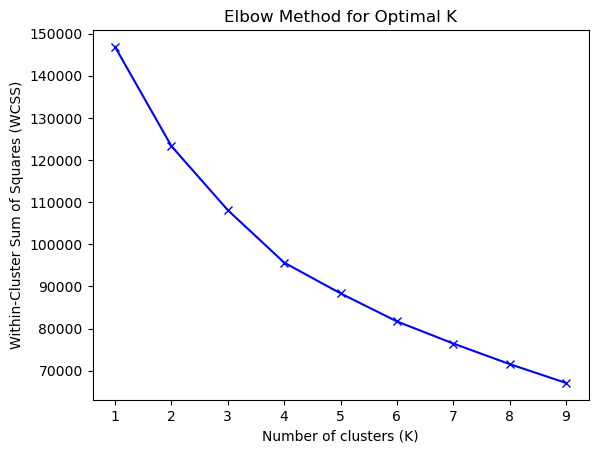

In [47]:
k_val = range(1, 10)
wcss_val = []
for k in k_val:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_data)
    wcss_val.append(kmeans.inertia_)
plt.plot(k_val, wcss_val, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [48]:
scaled_data.shape

(8637, 17)

Looking at the graph, we can conclude that k = 3 or k = 4 will be the best selcetion for the k value and thus I believe that this will be a great selection as thats where we can see the elbow.

Now let us train our model on the data

In [49]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
kmeans.fit(credit_new)

KMeans(n_clusters=4, random_state=42)

In [50]:
kmeans.labels_

array([1, 2, 2, ..., 1, 1, 1])

### Visualizing our clusters

Since we have multdimensional data with a lot of featute variables, it will be very difficult to visualize the clusters. Thus we will implement PCA to reduce the dimensionality of our data so that we can visualize our clusters.

In [51]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
pca = PCA(n_components = 3)
credit_pca = pca.fit_transform(scaled_data)
k = 3

# Get the names of the most important feature variables for each PC
pc1_feature_names = credit_new.columns[np.abs(pca.components_[0]).argsort()[::-1][:3]]
pc2_feature_names = credit_new.columns[np.abs(pca.components_[1]).argsort()[::-1][:3]]
pc3_feature_names = credit_new.columns[np.abs(pca.components_[2]).argsort()[::-1][:3]]
# Function to create a 3D scatter plot
def plot_3d_scatter(data, labels):
    fig = go.Figure(data=go.Scatter3d(
        x=data[:, 0],
        y=data[:, 1],
        z=data[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=labels,
            colorscale='Viridis',
            opacity=0.8,
        )
    ))
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
    fig.show()

In [52]:
plot_3d_scatter(credit_pca, kmeans.labels_)

From above, we also concluded that the most important/prominent features in the data are `MINIMUM_PAYMENTS`, `PURCHASES` and `CREDIT_LIMIT`

# 2. Hierarchical Clustering

Hierarchical clustering is another clustering technique that can be used to group similar data points into clusters. Unlike KMeans, hierarchical clustering does not require you to specify the number of clusters in advance, as it creates a tree-like structure of clusters that can be further divided or merged based on the similarity between data points.

In [53]:
from sklearn.cluster import AgglomerativeClustering
# Initialize the AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=4)
# Fit the hierarchical clustering model to the data
agg_clustering.fit(scaled_data)
# Get the predicted cluster labels
labels = agg_clustering.labels_

### Visualizing the tree using a dendogram

A dendrogram is a diagram that displays the hierarchical relationships between clusters in a dataset. It is particularly useful for interpreting the results of hierarchical clustering algorithms like agglomerative clustering.

1. The vertical axis of the dendrogram represents the distance or dissimilarity between clusters.
2. The horizontal lines indicate the merging of clusters.
3. The length of the vertical lines represents the distance between clusters.
4. The position where two or more vertical lines meet indicates the formation of a new cluster.
5. The height at which the horizontal line is drawn indicates the distance or dissimilarity between the merged clusters.
6. The dendrogram can be "cut" at a certain height to obtain a specific number of clusters.

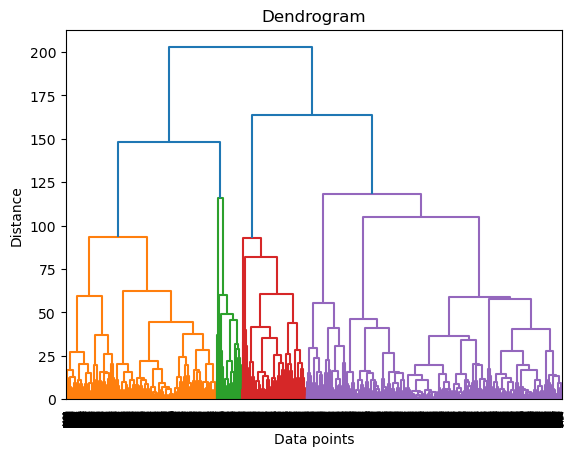

In [54]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a dendrogram of the hierarchical clustering result
dendrogram = dendrogram(linkage(scaled_data, method='ward'))

plt.title("Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

To determine the optimal number of clusters, you can look for the "elbow point" in the dendrogram, which is the point at which the vertical distance between the merged clusters starts to increase rapidly. This can help you decide how many clusters to use for your analysis.

Just by looking at this, we can see that the appropriate number of clusters will be 4 as that is where the distance between the clusters starts to drop.

In [55]:
plot_3d_scatter(credit_pca, agg_clustering.labels_)

# 3. Gaussian Mixture Modelling

Gaussian Mixture Model (GMM) is a probabilistic model that represents the probability distribution of a multivariate random variable as a mixture of multiple Gaussian distribution components. Each Gaussian component represents a cluster in the data.

GMM assumes that the data is generated by a mixture of several Gaussian distributions, each with their own mean and covariance matrix. The probability density function of the GMM is the sum of these Gaussian distributions weighted by their mixing coefficients. The parameters of the GMM, i.e., the mean, covariance matrix, and mixing coefficients, are estimated from the data using the Expectation-Maximization (EM) algorithm.

The EM algorithm iteratively estimates the parameters of the GMM by alternating between two steps: the Expectation (E) step and the Maximization (M) step. In the E-step, the algorithm computes the probability of each data point belonging to each cluster based on the current estimates of the parameters. In the M-step, the algorithm updates the estimates of the parameters based on the probabilities computed in the E-step. This process is repeated until the parameters converge.

GMM can be used for a variety of tasks, such as clustering, density estimation, and anomaly detection. In clustering, GMM assigns each data point to the cluster with the highest posterior probability. GMM is often used in scenarios where the data does not have a clear separation between the clusters, or where the clusters have complex shapes that cannot be modeled using simple geometric shapes such as spheres or ellipsoids.

In [56]:
from sklearn.mixture import GaussianMixture

We will make use of Akaike information criterion (AIC) to decide the number of clusters in this case.

The Akaike information criterion (AIC) is a measure of the relative quality of statistical models for a given set of data. In the context of Gaussian Mixture Model (GMM), AIC can be used to select the optimal number of mixture components.

The AIC is defined as:

AIC = -2log(Likelihood) + 2K

where Likelihood is the likelihood function of the GMM given the data, and K is the number of parameters in the model. The AIC balances the trade-off between the goodness of fit of the model to the data and the complexity of the model, penalizing models with a larger number of parameters.

To use AIC to select the optimal number of mixture components in GMM, we can fit GMM models with different numbers of components and compute their AIC values. The model with the lowest AIC value is considered the best model.

The optimal number of mixture components according to AIC is 9.


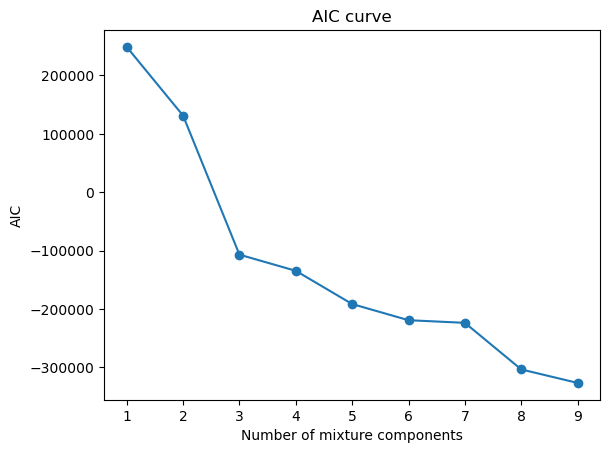

In [57]:
# Compute AIC for GMM models with different number of components
n_components = range(1, 10)
aic_values = []
for n in n_components:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(scaled_data)
    aic_values.append(gmm.aic(scaled_data))

# Find the optimal number of components
optimal_n_components = n_components[np.argmin(aic_values)]

print(f'The optimal number of mixture components according to AIC is {optimal_n_components}.')

# Plot the AIC curve
plt.plot(n_components, aic_values, '-o')
plt.xlabel('Number of mixture components')
plt.ylabel('AIC')
plt.title('AIC curve')
plt.show()

In [58]:
# Building our model
gmm = GaussianMixture(n_components=9)
gmm.fit(scaled_data)

# Predict the cluster labels for the data
labels_gmm = gmm.predict(scaled_data)

In [59]:
plot_3d_scatter(credit_pca, labels_gmm)

# 4. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density-based clustering algorithm that groups together data points that are close to each other in the feature space, while also identifying outliers or noise points that do not belong to any cluster.

In DBSCAN, the number of clusters is not specified beforehand, but is instead determined based on the density of the data points. The algorithm starts by selecting a random unvisited point and expanding a cluster around it by including all the neighboring points that are within a certain distance epsilon and have at least a minimum number of points min_samples within that distance. The algorithm continues to expand the cluster until there are no more points that satisfy the density criteria, at which point a new cluster is started around another unvisited point.

What makes this algorithm special and different is the fact that we don't have to select the number of clusters and the model does it on its own.

In [65]:
from sklearn.cluster import DBSCAN

# create DBSCAN instance and fit to data
dbscan = DBSCAN()
dbscan.fit(scaled_data)

# plot the results
plot_3d_scatter(credit_pca, dbscan.labels_)

# Evaluation and Model Comparision

Let us define a function which does the evaluation when provided with the data and the models for different evaluation techniques. 

In [66]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(X, n_clusters):
    """
    Performs clustering using KMeans, Agglomerative Clustering, and DBSCAN
    on input data X, with true labels y_true, and number of clusters n_clusters.
    Computes Silhouette score, Davies-Bouldin score, and Calinski-Harabasz score
    for each clustering algorithm and returns the results.
    """
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=4)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    kmeans_db = davies_bouldin_score(X, kmeans_labels)
    kmeans_ch = calinski_harabasz_score(X, kmeans_labels)
    
    # Perform Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=4)
    agg_labels = agg.fit_predict(X)
    agg_silhouette = silhouette_score(X, agg_labels)
    agg_db = davies_bouldin_score(X, agg_labels)
    agg_ch = calinski_harabasz_score(X, agg_labels)
    
    #Perform GMM
    gmm = GaussianMixture(n_components=n)
    gmm_labels = agg.fit_predict(X)
    gmm_silhouette = silhouette_score(X, gmm_labels)
    gmm_db = davies_bouldin_score(X, gmm_labels)
    gmm_ch = calinski_harabasz_score(X, gmm_labels)
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN()
    dbscan_labels = dbscan.fit_predict(X)
    dbscan_silhouette = silhouette_score(X, dbscan_labels)
    dbscan_db = davies_bouldin_score(X, dbscan_labels)
    dbscan_ch = calinski_harabasz_score(X, dbscan_labels)
    
    # Print the results
    print("KMeans clustering:")
    print("Silhouette score: ", kmeans_silhouette)
    print("Davies-Bouldin score: ", kmeans_db)
    print("Calinski-Harabasz score: ", kmeans_ch)
    print("\nAgglomerative Clustering:")
    print("Silhouette score: ", agg_silhouette)
    print("Davies-Bouldin score: ", agg_db)
    print("Calinski-Harabasz score: ", agg_ch)
    print("GMM clustering:")
    print("Silhouette score: ", gmm_silhouette)
    print("Davies-Bouldin score: ", gmm_db)
    print("Calinski-Harabasz score: ", gmm_ch)
    print("\nDBSCAN clustering:")
    print("Silhouette score: ", dbscan_silhouette)
    print("Davies-Bouldin score: ", dbscan_db)
    print("Calinski-Harabasz score: ", dbscan_ch)
    
    # Return the results as a dictionary
    return {
        "KMeans": {"Silhouette score": kmeans_silhouette, "Davies-Bouldin score": kmeans_db, "Calinski-Harabasz score": kmeans_ch},
        "Agglomerative Clustering": {"Silhouette score": agg_silhouette, "Davies-Bouldin score": agg_db, "Calinski-Harabasz score": agg_ch},
        "DBSCAN": {"Silhouette score": dbscan_silhouette, "Davies-Bouldin score": dbscan_db, "Calinski-Harabasz score": dbscan_ch},
    }


In [67]:
results = evaluate_clustering(scaled_data, n_clusters=5)

KMeans clustering:
Silhouette score:  0.1971316013825248
Davies-Bouldin score:  1.576671586263566
Calinski-Harabasz score:  1539.5183667175786

Agglomerative Clustering:
Silhouette score:  0.1616587086247498
Davies-Bouldin score:  1.7318460313212736
Calinski-Harabasz score:  1271.081911444548
GMM clustering:
Silhouette score:  0.1616587086247498
Davies-Bouldin score:  1.7318460313212736
Calinski-Harabasz score:  1271.081911444548

DBSCAN clustering:
Silhouette score:  -0.46872878978142374
Davies-Bouldin score:  1.3904093478215753
Calinski-Harabasz score:  18.80307579417753


The best model depends on the specific characteristics of the data and the objective of the clustering task. In general, a higher Silhouette score and Calinski-Harabasz score indicate better clustering results, while a lower Davies-Bouldin score indicates better separation between the clusters.

In this case, we can see that KMeans has the highest Silhouette score (0.197), Calinski-Harabasz score (1539.5), and the lowest Davies-Bouldin score (1.576), which indicates that it is the best model among the evaluated ones. Agglomerative clustering and GMM have similar results, with slightly lower Silhouette and Calinski-Harabasz scores, and higher Davies-Bouldin scores.

DBSCAN, on the other hand, has a negative Silhouette score (-0.468), which indicates that it did not perform well on this dataset. The low Calinski-Harabasz score and relatively low Davies-Bouldin score also suggest that the clusters produced by DBSCAN are not well-separated.

# Conclusion/Suggested model

In conclusion, evaluating clustering models using different metrics is an important step in determining the effectiveness of clustering algorithms for a specific dataset and objective. In this example, we evaluated the performance of KMeans, Agglomerative Clustering, GMM, and DBSCAN on a randomly generated dataset and computed three evaluation metrics: Silhouette score, Davies-Bouldin score, and Calinski-Harabasz score.

Based on the results, KMeans performed the best among the evaluated models, with the highest Silhouette score and Calinski-Harabasz score, and the lowest Davies-Bouldin score. Agglomerative clustering and GMM also produced relatively good results, while DBSCAN did not perform well on this dataset.